In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Show all columns when printing DataFrames
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)

# Paths (starting from the notebook folder)
PROJECT_ROOT = Path("..").resolve()
DATA_DIR = PROJECT_ROOT / "data" / "downloads"

print("Project root:", PROJECT_ROOT)
print("Data directory:", DATA_DIR)


Project root: C:\Users\iacon\Documents\data_science_training\prj_AccidentsFrance
Data directory: C:\Users\iacon\Documents\data_science_training\prj_AccidentsFrance\data\downloads


In [3]:
csv_files = list(DATA_DIR.glob("*.csv"))

print(f"Found {len(csv_files)} CSV files:\n")
for f in csv_files:
    print("-", f.name)


Found 5 CSV files:

- caracteristics.csv
- holidays.csv
- places.csv
- users.csv
- vehicles.csv


Analisys file -> caracteristics.csv

In [ ]:
file_name = "caracteristics.csv"  # specify the file to load

file_path = DATA_DIR / file_name
print("Loading:", file_path)

df = pd.read_csv(
    file_path,
    sep=",",          # comma separator
    encoding="latin1",  # handle accented chars like è, é, etc.
    engine="python"     # more flexible parser
)

df.head()


Loading: C:\Users\iacon\Documents\data_science_training\prj_AccidentsFrance\data\downloads\caracteristics.csv


,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0,590


In [9]:
print("Shape (rows, columns):", df.shape)

print("\nColumn names:")
print(df.columns)

print("\nDataFrame info:")
df.info()


Shape (rows, columns): (839985, 16)

Column names:
Index(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm', 'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep'], dtype='object')

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839985 non-null  int64  
 1   an       839985 non-null  int64  
 2   mois     839985 non-null  int64  
 3   jour     839985 non-null  int64  
 4   hrmn     839985 non-null  int64  
 5   lum      839985 non-null  int64  
 6   agg      839985 non-null  int64  
 7   int      839985 non-null  int64  
 8   atm      839930 non-null  float64
 9   col      839974 non-null  float64
 10  com      839983 non-null  float64
 11  adr      699443 non-null  object 
 12  gps      366226 non-null  object 
 13  lat      362471 non-null  float64
 14  long     362467 non-null  object 
 15  dep      8

In [10]:
df.describe()


,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,lat,dep
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839930.000000,839974.000000,839983.000000,3.624710e+05,839985.000000
mean,2.010011e+11,10.011129,6.679437,15.594687,1381.093505,1.912588,1.685924,1.694066,1.547116,4.187484,186.510172,2.849715e+06,564.257671
std,3.458009e+08,3.458059,3.389489,8.750201,540.757462,1.517900,0.464147,1.510792,1.587668,1.974998,171.873105,2.284591e+06,291.153083
min,2.005000e+11,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,10.000000
25%,2.007000e+11,7.000000,4.000000,8.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,3.000000,55.000000,0.000000e+00,310.000000
50%,2.010000e+11,10.000000,7.000000,15.000000,1446.000000,1.000000,2.000000,1.000000,1.000000,3.000000,118.000000,4.370200e+06,630.000000
75%,2.013000e+11,13.000000,10.000000,23.000000,1810.000000,3.000000,2.000000,2.000000,1.000000,6.000000,278.000000,4.799218e+06,780.000000
max,2.016001e+11,16.000000,12.000000,31.000000,2359.000000,5.000000,2.000000,9.000000,9.000000,7.000000,987.000000,5.564823e+06,976.000000


In [11]:
if "an" in df.columns:
    print("Accidents per year:")
    print(df["an"].value_counts().sort_index())

if "mois" in df.columns:
    print("\nAccidents per month:")
    print(df["mois"].value_counts().sort_index())

if "lum" in df.columns:
    print("\nDistribution of 'lum' (light conditions):")
    print(df["lum"].value_counts())


Accidents per year:
an
5     87026
6     82993
7     83850
8     76767
9     74409
10    69379
11    66974
12    62250
13    58397
14    59854
15    58654
16    59432
Name: count, dtype: int64

Accidents per month:
mois
1     64662
2     56584
3     65630
4     67430
5     72443
6     78372
7     74466
8     62401
9     76977
10    79559
11    72645
12    68816
Name: count, dtype: int64

Distribution of 'lum' (light conditions):
lum
1    576861
5    141279
3     65811
2     49140
4      6894
Name: count, dtype: int64


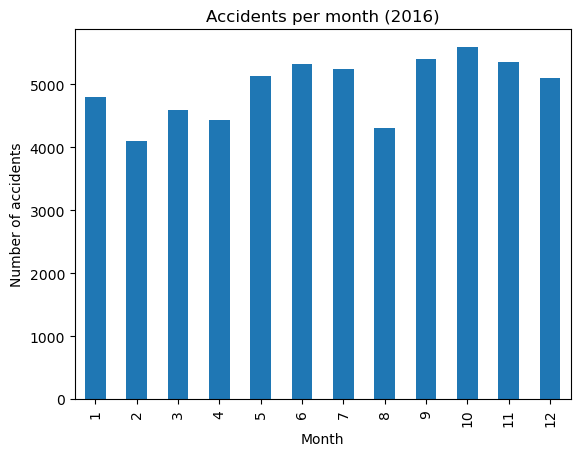

In [ ]:
if "an" in df.columns and "mois" in df.columns:
    df_2016 = df[df["an"] == 16]  # or another year found in your data

    accidents_per_month = df_2016["mois"].value_counts().sort_index()

    accidents_per_month.plot(kind="bar")
    plt.xlabel("Month")
    plt.ylabel("Number of accidents")
    plt.title("Accidents per month (2016)")
    plt.show()



Analisys file: -> holidays.csv

In [4]:
file_name = "holidays.csv"  # specify the file to load

file_path = DATA_DIR / file_name
print("Loading:", file_path)

df = pd.read_csv(
    file_path,
    sep=",",          # comma separator
    encoding="latin1",  # handle accented chars like è, é, etc.
    engine="python"     # more flexible parser
)

df.head()


Loading: C:\Users\iacon\Documents\data_science_training\prj_AccidentsFrance\data\downloads\holidays.csv


,ds,holiday
0,2005-01-01,New year
1,2005-03-28,Easter Monday
2,2005-05-01,Labour Day
3,2005-05-05,Ascension Thursday
4,2005-05-08,Victory in Europe Day


In [9]:
print("Shape (rows, columns):", df.shape)

print("\nData types in the DataFrame:")
print(df.dtypes)

print("\nColumn names:")
print(df.columns)

print("\nDataFrame info:")
df.info()

print("\nDataFrame describe:")
df.describe()

Shape (rows, columns): (132, 2)

Data types in the DataFrame:
ds         object
holiday    object
dtype: object

Column names:
Index(['ds', 'holiday'], dtype='object')

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ds       132 non-null    object
 1   holiday  132 non-null    object
dtypes: object(2)
memory usage: 2.2+ KB

DataFrame describe:


Shape (rows, columns): (132, 2)

Data types in the DataFrame:
ds         object
holiday    object
dtype: object

Column names:
Index(['ds', 'holiday'], dtype='object')

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ds       132 non-null    object
 1   holiday  132 non-null    object
dtypes: object(2)
memory usage: 2.2+ KB

DataFrame describe:


,ds,holiday
count,132,132
unique,131,11
top,2008-05-01,New year
freq,2,12


Characteristics columns: ['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm', 'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep']

Holidays columns: ['ds', 'holiday']


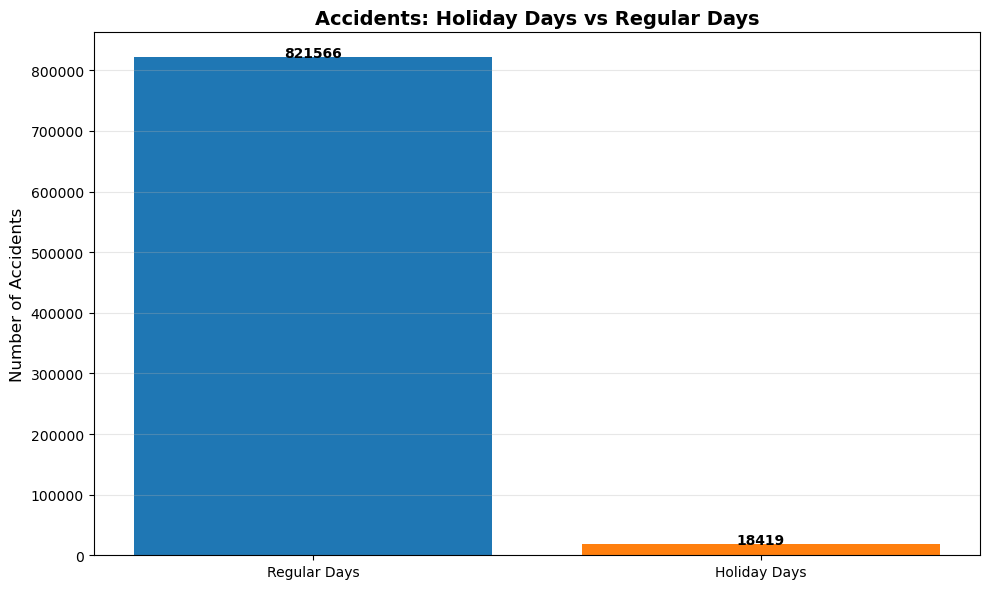


Total accidents on regular days: 821566
Total accidents on holiday days: 18419


In [11]:
# Load both datasets for comparison
holidays_df = df.copy()  # holidays dataframe already loaded

# Reload characteristics data
characteristics_path = DATA_DIR / "caracteristics.csv"
char_df = pd.read_csv(
    characteristics_path,
    sep=",",
    encoding="latin1",
    engine="python"
)

# Convert 'ds' column to datetime for holidays
holidays_df['ds'] = pd.to_datetime(holidays_df['ds'])

# Check if characteristics has a date column (jour, mois, an)
print("Characteristics columns:", char_df.columns.tolist())
print("\nHolidays columns:", holidays_df.columns.tolist())

# Create a date column in characteristics if possible
if 'jour' in char_df.columns and 'mois' in char_df.columns and 'an' in char_df.columns:
    # Create date from jour, mois, an (an is 2-digit year: 05=2005, 16=2016)
    char_df['date'] = pd.to_datetime(
        (2000 + char_df['an']).astype(str) + '-' + 
        char_df['mois'].astype(str).str.zfill(2) + '-' + 
        char_df['jour'].astype(str).str.zfill(2),
        format='%Y-%m-%d',
        errors='coerce'
    )
    
    # Mark which accidents occur on holidays
    char_df['is_holiday'] = char_df['date'].isin(holidays_df['ds'])
    
    # Count accidents
    accident_counts = char_df['is_holiday'].value_counts()
    
    # Create comparison chart
    fig, ax = plt.subplots(figsize=(10, 6))
    categories = ['Regular Days', 'Holiday Days']
    values = [accident_counts[False], accident_counts[True]]
    
    ax.bar(categories, values, color=['#1f77b4', '#ff7f0e'])
    ax.set_ylabel('Number of Accidents', fontsize=12)
    ax.set_title('Accidents: Holiday Days vs Regular Days', fontsize=14, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(values):
        ax.text(i, v + 1000, str(v), ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nTotal accidents on regular days: {accident_counts[False]}")
    print(f"Total accidents on holiday days: {accident_counts[True]}")

In [13]:
# Display the updated characteristics dataframe with the is_holiday column
print("=" * 60)
print("UPDATED CHARACTERISTICS TABLE")
print("=" * 60)
print("\nFirst 20 rows of the characteristics data with is_holiday flag:")
print(char_df[['date', 'jour', 'mois', 'an', 'is_holiday']].head(20))

print(f"\nDataFrame shape: {char_df.shape}")
print(f"\nTotal rows with is_holiday=True: {char_df['is_holiday'].sum()}")
print(f"Total rows with is_holiday=False: {(~char_df['is_holiday']).sum()}")

# Show some holiday examples with accident count per day
print("\nSample of accidents on holiday dates with accident count per day:")

# Count accidents per date
accidents_per_date = char_df.groupby('date').size().reset_index(name='accidents_count')

# Merge with holiday data
holiday_sample = char_df[char_df['is_holiday']][['date', 'jour', 'mois', 'an', 'is_holiday']].drop_duplicates('date').head(10)
holiday_sample = holiday_sample.merge(accidents_per_date, on='date', how='left')

print(holiday_sample.to_string(index=False))

# Show overall statistics by holiday flag
print("\n\nStatistics of accidents by day type:")
stats_by_holiday = char_df.groupby('is_holiday').agg({
    'Num_Acc': 'count',  # Total accidents
    'date': 'nunique'    # Unique dates
}).rename(columns={'Num_Acc': 'Total Accidents', 'date': 'Unique Dates'})

# Calculate average accidents per day
stats_by_holiday['Avg Accidents per Day'] = stats_by_holiday['Total Accidents'] / stats_by_holiday['Unique Dates']

print(stats_by_holiday)

UPDATED CHARACTERISTICS TABLE

First 20 rows of the characteristics data with is_holiday flag:
         date  jour  mois  an  is_holiday
0  2016-02-01     1     2  16       False
1  2016-03-16    16     3  16       False
2  2016-07-13    13     7  16       False
3  2016-08-15    15     8  16        True
4  2016-12-23    23    12  16       False
5  2016-12-23    23    12  16       False
6  2016-05-01     1     5  16        True
7  2016-05-14    14     5  16       False
8  2016-09-23    23     9  16       False
9  2016-12-30    30    12  16       False
10 2016-01-25    25     1  16       False
11 2016-01-28    28     1  16       False
12 2016-02-05     5     2  16       False
13 2016-04-17    17     4  16       False
14 2016-08-17    17     8  16       False
15 2016-09-08     8     9  16       False
16 2016-11-08     8    11  16       False
17 2016-11-28    28    11  16       False
18 2016-05-06     6     5  16       False
19 2016-09-05     5     9  16       False

DataFrame shape: (8399

ANALYSIS 1: AVERAGE ACCIDENTS PER DAY

Number of holiday days in the period: 131
Number of regular days in the period: 4252

Total accidents on holiday days: 18419
Total accidents on regular days: 821566

Average accidents per HOLIDAY day: 140.60
Average accidents per REGULAR day: 193.22

Difference: -27.2%
→ Holiday days have FEWER accidents on average


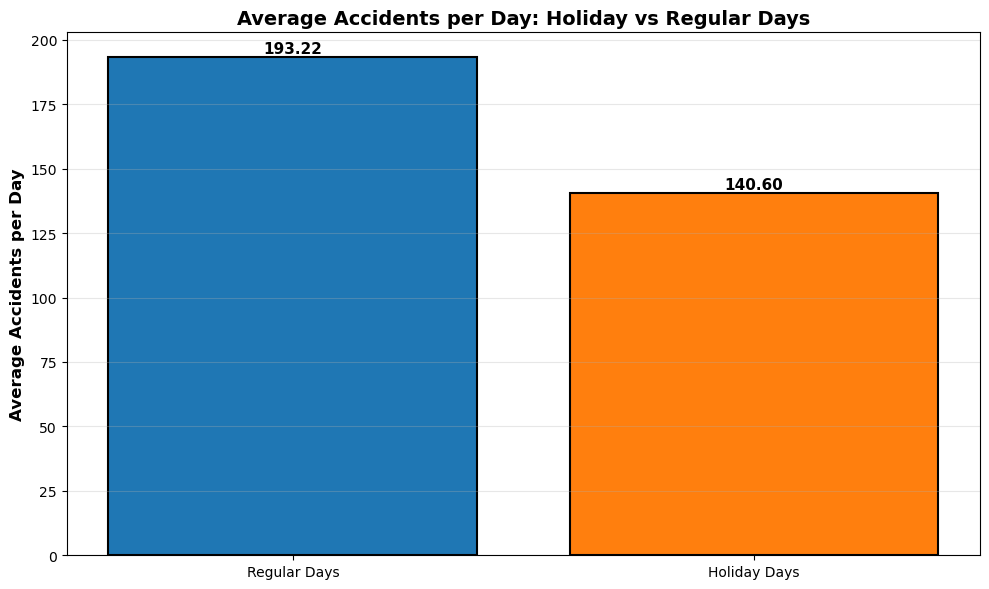

In [14]:
# ANALYSIS 1: Average accidents per day (holiday vs regular days)
print("=" * 60)
print("ANALYSIS 1: AVERAGE ACCIDENTS PER DAY")
print("=" * 60)

# Count number of holiday and regular days in the period
num_holiday_days = holidays_df['ds'].nunique()
num_days_in_dataset = (char_df['date'].max() - char_df['date'].min()).days + 1
num_regular_days = num_days_in_dataset - num_holiday_days

# Calculate average accidents per day
total_accidents_holiday = accident_counts[True]
total_accidents_regular = accident_counts[False]

avg_accidents_holiday = total_accidents_holiday / num_holiday_days
avg_accidents_regular = total_accidents_regular / num_regular_days

print(f"\nNumber of holiday days in the period: {num_holiday_days}")
print(f"Number of regular days in the period: {num_regular_days}")

print(f"\nTotal accidents on holiday days: {total_accidents_holiday}")
print(f"Total accidents on regular days: {total_accidents_regular}")

print(f"\nAverage accidents per HOLIDAY day: {avg_accidents_holiday:.2f}")
print(f"Average accidents per REGULAR day: {avg_accidents_regular:.2f}")

# Calculate percentage difference
diff_percentage = ((avg_accidents_holiday - avg_accidents_regular) / avg_accidents_regular) * 100
print(f"\nDifference: {diff_percentage:+.1f}%")
if diff_percentage > 0:
    print(f"→ Holiday days have MORE accidents on average")
else:
    print(f"→ Holiday days have FEWER accidents on average")

# Comparison chart
fig, ax = plt.subplots(figsize=(10, 6))
categories = ['Regular Days', 'Holiday Days']
values = [avg_accidents_regular, avg_accidents_holiday]

bars = ax.bar(categories, values, color=['#1f77b4', '#ff7f0e'], edgecolor='black', linewidth=1.5)
ax.set_ylabel('Average Accidents per Day', fontsize=12, fontweight='bold')
ax.set_title('Average Accidents per Day: Holiday vs Regular Days', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, v) in enumerate(zip(bars, values)):
    ax.text(bar.get_x() + bar.get_width()/2, v + 0.5, f'{v:.2f}', 
            ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()


ANALYSIS 2: ACCIDENTS BY HOLIDAY TYPE

Accidents by holiday type:
                Holiday Type  Total Accidents  Days with Holiday  Avg Accidents per Day
                Bastille Day             1915                 12             159.583333
                  Labour Day             1897                 12             158.083333
       Victory in Europe Day             1843                 12             153.583333
              All Saints Day             1831                 12             152.583333
               Armistice Day             1811                 12             150.916667
                 Whit Monday             1811                 12             150.916667
          Ascension Thursday             1787                 12             148.916667
Assumption of Mary to Heaven             1663                 12             138.583333
                    New year             1511                 12             125.916667
               Easter Monday             1489        

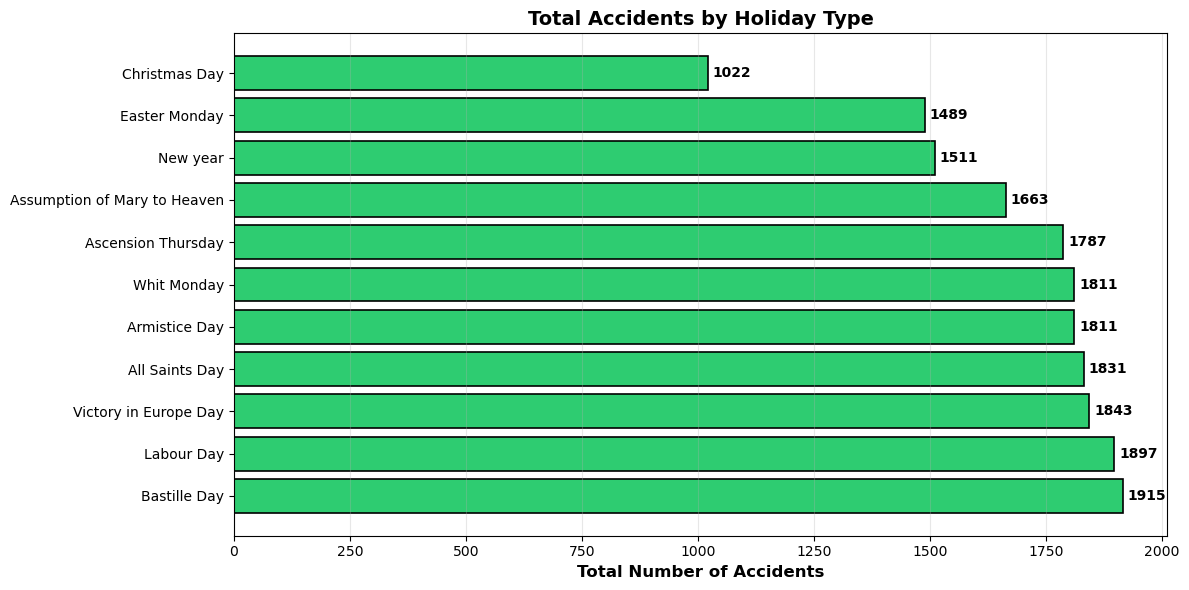

In [15]:
# ANALYSIS 2: Accidents by holiday type
print("\n" + "=" * 60)
print("ANALYSIS 2: ACCIDENTS BY HOLIDAY TYPE")
print("=" * 60)

# Merge holidays with accidents
holidays_with_accidents = holidays_df.copy()
holidays_with_accidents['date'] = holidays_with_accidents['ds']
holidays_with_accidents['num_accidents'] = holidays_with_accidents['date'].map(
    char_df[char_df['is_holiday']].groupby('date').size()
)
holidays_with_accidents['num_accidents'] = holidays_with_accidents['num_accidents'].fillna(0).astype(int)

# Group by holiday type and count accidents
accidents_by_holiday_type = holidays_with_accidents.groupby('holiday')['num_accidents'].agg(['sum', 'count', 'mean']).reset_index()
accidents_by_holiday_type.columns = ['Holiday Type', 'Total Accidents', 'Days with Holiday', 'Avg Accidents per Day']
accidents_by_holiday_type = accidents_by_holiday_type.sort_values('Total Accidents', ascending=False)

print("\nAccidents by holiday type:")
print(accidents_by_holiday_type.to_string(index=False))

# Chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(accidents_by_holiday_type['Holiday Type'], accidents_by_holiday_type['Total Accidents'], 
        color='#2ecc71', edgecolor='black', linewidth=1.2)
ax.set_xlabel('Total Number of Accidents', fontsize=12, fontweight='bold')
ax.set_title('Total Accidents by Holiday Type', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(accidents_by_holiday_type['Total Accidents']):
    ax.text(v + 10, i, str(int(v)), va='center', fontweight='bold')

plt.tight_layout()
plt.show()


ANALYSIS 3: ACCIDENTS BY MONTH (HOLIDAY vs REGULAR DAYS)

Average accidents per day by month:
      Avg Regular Days  Avg Holiday Days
mois                                    
1           175.419444        125.916667
2           166.914454               NaN
3           176.951220        111.666667
4           188.820513        128.222222
5           199.948485        153.809524
6           218.746479        143.400000
7           201.530556        159.583333
8           168.716667        138.583333
9           213.825000               NaN
10          213.868280               NaN
11          205.366071        151.750000
12          188.316667         85.166667


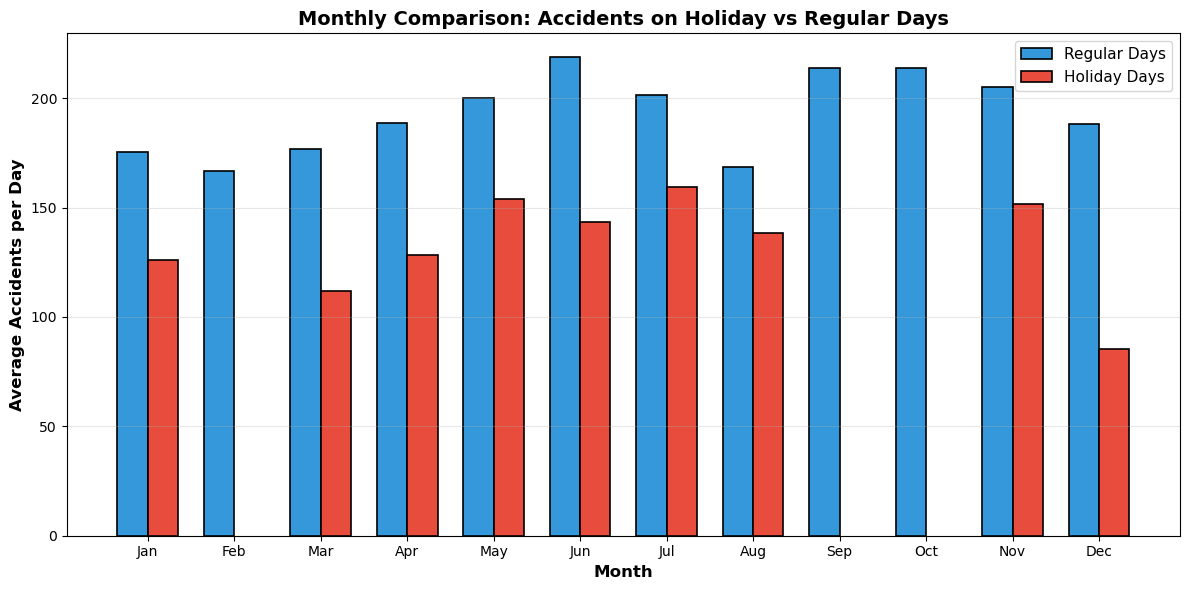


Interpretation:
If the red bars (Holiday Days) are higher than the blue bars (Regular Days),
it means that accidents are more frequent on holiday days in that month.


In [18]:
# ANALYSIS 3: Accidents by month (holiday vs regular days)
print("\n" + "=" * 60)
print("ANALYSIS 3: ACCIDENTS BY MONTH (HOLIDAY vs REGULAR DAYS)")
print("=" * 60)

# Add month column to char_df
char_df['mois'] = pd.to_datetime(char_df['date']).dt.month

# Calculate accidents per month, distinguishing holiday and regular days
monthly_analysis = char_df.groupby(['mois', 'is_holiday']).size().unstack(fill_value=0)

# Calculate holiday and regular days per month
days_per_month = char_df.groupby(['mois', 'is_holiday']).nunique()['date'].unstack(fill_value=0)

# Calculate average per day per month
# Note: columns are False (regular days) and True (holiday days), not 0 and 1
if False in monthly_analysis.columns and True in monthly_analysis.columns:
    avg_per_month = pd.DataFrame({
        'Avg Regular Days': monthly_analysis[False] / days_per_month[False],
        'Avg Holiday Days': monthly_analysis[True] / days_per_month[True]
    })
else:
    avg_per_month = pd.DataFrame()

print("\nAverage accidents per day by month:")
print(avg_per_month)

# Chart: monthly comparison
fig, ax = plt.subplots(figsize=(12, 6))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_labels = [months[int(m)-1] if int(m) <= 12 else f'Month {m}' for m in avg_per_month.index]

x = np.arange(len(month_labels))
width = 0.35

if 'Avg Regular Days' in avg_per_month.columns and 'Avg Holiday Days' in avg_per_month.columns:
    bars1 = ax.bar(x - width/2, avg_per_month['Avg Regular Days'], width, label='Regular Days', 
                   color='#3498db', edgecolor='black', linewidth=1.2)
    bars2 = ax.bar(x + width/2, avg_per_month['Avg Holiday Days'], width, label='Holiday Days', 
                   color='#e74c3c', edgecolor='black', linewidth=1.2)
    
    ax.set_xlabel('Month', fontsize=12, fontweight='bold')
    ax.set_ylabel('Average Accidents per Day', fontsize=12, fontweight='bold')
    ax.set_title('Monthly Comparison: Accidents on Holiday vs Regular Days', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(month_labels)
    ax.legend(fontsize=11)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("If the red bars (Holiday Days) are higher than the blue bars (Regular Days),")
print("it means that accidents are more frequent on holiday days in that month.")

Analysis file ->  places.csv

In [19]:
file_name = "places.csv"  # specify the file to load

file_path = DATA_DIR / file_name
print("Loading:", file_path)

df = pd.read_csv(
    file_path,
    sep=",",          # comma separator
    encoding="latin1",  # handle accented chars like è, é, etc.
    engine="python"     # more flexible parser
)

df.head()


Loading: C:\Users\iacon\Documents\data_science_training\prj_AccidentsFrance\data\downloads\places.csv


,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201600000001,3.0,39,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
1,201600000002,3.0,39,NaN,NaN,1.0,0.0,NaN,NaN,0.0,1.0,2.0,0.0,58.0,1.0,0.0,1.0,0.0
2,201600000003,3.0,1,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,3.0,0.0,68.0,2.0,0.0,3.0,99.0
3,201600000004,4.0,0,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
4,201600000005,4.0,0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0


In [20]:
print("Shape (rows, columns):", df.shape)

print("\nData types in the DataFrame:")
print(df.dtypes)

print("\nColumn names:")
print(df.columns)

print("\nDataFrame info:")
df.info()

print("\nDataFrame describe:")
df.describe()

Shape (rows, columns): (839985, 18)

Data types in the DataFrame:
Num_Acc      int64
catr       float64
voie        object
v1         float64
v2          object
circ       float64
nbv        float64
pr         float64
pr1        float64
vosp       float64
prof       float64
plan       float64
lartpc     float64
larrout    float64
surf       float64
infra      float64
situ       float64
env1       float64
dtype: object

Column names:
Index(['Num_Acc', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'pr', 'pr1', 'vosp', 'prof', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ', 'env1'], dtype='object')

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839985 non-null  int64  
 1   catr     839984 non-null  float64
 2   voie     780914 non-null  object 
 3   v1       332816 non-null  float64
 4   v2       33953 non-null   o

,Num_Acc,catr,v1,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
count,8.399850e+05,839984.000000,332816.000000,839187.000000,838195.000000,414770.000000,413463.000000,838345.000000,838924.000000,838909.000000,830440.000000,831706.000000,838968.000000,838707.000000,838983.000000,838709.000000
mean,2.010011e+11,3.418247,0.068575,1.855246,2.039593,109.701206,276.792763,0.130675,1.135474,1.198732,5.256996,58.389998,1.257012,0.438958,1.147201,37.916588
std,3.458009e+08,1.207917,0.567640,0.720949,1.550779,499.309309,357.941312,0.555434,0.620295,0.722200,21.801291,62.527755,0.954748,1.350905,0.722495,47.979898
min,2.005000e+11,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-81.000000,0.000000,0.000000,0.000000,0.000000
25%,2.007000e+11,3.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,2.010000e+11,4.000000,0.000000,2.000000,2.000000,6.000000,100.000000,0.000000,1.000000,1.000000,0.000000,60.000000,1.000000,0.000000,1.000000,0.000000
75%,2.013000e+11,4.000000,0.000000,2.000000,2.000000,28.000000,500.000000,0.000000,1.000000,1.000000,0.000000,80.000000,1.000000,0.000000,1.000000,99.000000
max,2.016001e+11,9.000000,9.000000,4.000000,99.000000,9900.000000,9540.000000,3.000000,4.000000,4.000000,960.000000,999.000000,9.000000,7.000000,5.000000,99.000000


MISSING VALUES ANALYSIS: places.csv
Total rows: 839985

Missing counts and % by column:

         missing_count  missing_pct
v2              806032    95.957904
v1              507169    60.378340
pr1             426522    50.777335
pr              425215    50.621737
voie             59071     7.032387
lartpc            9545     1.136330
larrout           8279     0.985613
nbv               1790     0.213099
vosp              1640     0.195242
infra             1278     0.152146
env1              1276     0.151907
plan              1076     0.128098
prof              1061     0.126312
surf              1017     0.121074
situ              1002     0.119288
circ               798     0.095002
catr                 1     0.000119
Num_Acc              0     0.000000

Columns with >50% missing:
 ['v2', 'v1', 'pr1', 'pr']

Distribution of missing columns per row (top 20):
0       7337
1     150175
2     256927
3     168241
4     218067
5      34760
6        664
7       2456
8        229
9   

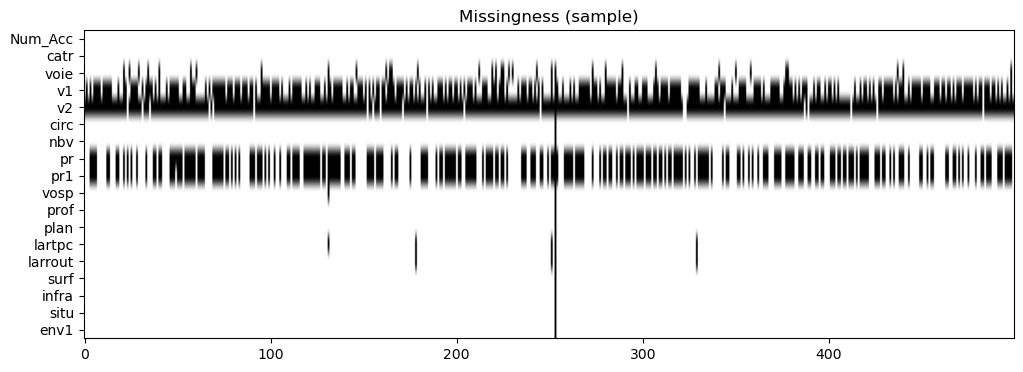


Recommendations:
- For columns with >50% missing: consider dropping or treat separately (e.g., v2, if present).
- For columns with moderate missing (10-50%): investigate patterns and consider imputation or "unknown" category for categorical fields.
- For numeric columns with outliers/sentinels (e.g., negative lartpc): map sentinels to NaN before imputation.
- Convert categorical-coded floats to category dtype for memory and analysis (e.g., catr, circ, surf, infra, situ, env1).
- Merge with `characteristics.csv` on `Num_Acc` to enrich and possibly infer missing values (e.g., location/date).


In [21]:
# NaN analysis for places.csv
print("="*60)
print("MISSING VALUES ANALYSIS: places.csv")
print("="*60)

n_rows = len(df)
print(f"Total rows: {n_rows}\n")

missing = df.isna().sum()
missing_pct = 100 * missing / n_rows
nan_table = pd.DataFrame({
    'missing_count': missing,
    'missing_pct': missing_pct
}).sort_values('missing_pct', ascending=False)

print("Missing counts and % by column:\n")
print(nan_table.to_string())

# Columns with high missingness
high_missing = nan_table[nan_table['missing_pct'] > 50]
print("\nColumns with >50% missing:\n", high_missing.index.tolist())

# Distribution of number of missing columns per row
missing_per_row = df.isna().sum(axis=1)
print("\nDistribution of missing columns per row (top 20):")
print(missing_per_row.value_counts().sort_index().head(20))

# Show samples of rows where important columns are missing
check_cols = [c for c in ['voie','v1','v2','pr','pr1'] if c in df.columns]
for col in check_cols:
    n_missing = df[col].isna().sum()
    print(f"\nColumn '{col}' missing: {n_missing} rows ({n_missing/n_rows*100:.2f}%)")
    print(df.loc[df[col].isna(), ['Num_Acc','catr','voie','v1','v2','pr','pr1']].head(5))

# Show sample of holiday-related rows might be useful (if merged later)
print("\nSample rows (first 5):")
print(df.head()[['Num_Acc','catr','voie','v1','v2']])

# Visual missingness (sampled to avoid huge plot)
try:
    import seaborn as sns
    sample = df.sample(n=min(1000, n_rows), random_state=1)
    plt.figure(figsize=(12,6))
    sns.heatmap(sample.isna().T, cbar=False)
    plt.title('Missingness heatmap (sample)')
    plt.xlabel('sampled rows')
    plt.ylabel('columns')
    plt.show()
except Exception:
    sample = df.sample(n=min(500, n_rows), random_state=1)
    plt.figure(figsize=(12,4))
    plt.imshow(sample.isna().T, aspect='auto', cmap='gray_r')
    plt.yticks(range(len(sample.columns)), sample.columns)
    plt.title('Missingness (sample)')
    plt.show()

# Quick recommendations
print('\nRecommendations:')
print('- For columns with >50% missing: consider dropping or treat separately (e.g., v2, if present).')
print('- For columns with moderate missing (10-50%): investigate patterns and consider imputation or "unknown" category for categorical fields.')
print('- For numeric columns with outliers/sentinels (e.g., negative lartpc): map sentinels to NaN before imputation.')
print('- Convert categorical-coded floats to category dtype for memory and analysis (e.g., catr, circ, surf, infra, situ, env1).')
print('- Merge with `characteristics.csv` on `Num_Acc` to enrich and possibly infer missing values (e.g., location/date).')
